In [2]:
import pandas as pd
import numpy as np

In [5]:
X_2house = pd.read_csv('/wgdisk/ho0338/ek79/Tien/X_2house_v2.csv')
X_2house=X_2house.drop(columns=['Unnamed: 0'])
X_2house.index.rename('Order', inplace=True)

In [6]:
y_2house = np.load('y_2house.npy')

## preparing the data input to ML 

In [18]:
# load the saved csv
# !head -10 /wgdisk/ho0331/ek79/Tien_DS/X_2house.csv
# X_2house = pd.read_csv('/wgdisk/ho0331/ek79/Tien_DS/X_2house.csv')

In [7]:
X_2house.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Misc Val_2,Mo Sold_2,Yr Sold_2,Sale Type_2,Sale Condition_2,Bsmt Bath_2,Total Bath_2,Porch SF_2,Total House SF_2,Sold Time_2
Order,,,,,,,,,,,,,,,,,,,,,
0,20.0,4.0,141.0,31770.0,1.0,1.0,0.0,3.0,4.0,0.0,...,0.0,6.0,2010.0,0.0,3.0,0.000000,1.0,0.041096,2920.0,54.0
1,20.0,4.0,141.0,31770.0,1.0,1.0,0.0,3.0,4.0,0.0,...,12500.0,6.0,2010.0,0.0,3.0,0.000000,1.5,0.008086,4452.0,54.0
2,20.0,4.0,141.0,31770.0,1.0,1.0,0.0,3.0,4.0,0.0,...,0.0,4.0,2010.0,0.0,3.0,0.285714,3.5,0.000000,6330.0,52.0
3,20.0,4.0,141.0,31770.0,1.0,1.0,0.0,3.0,4.0,0.0,...,0.0,3.0,2010.0,0.0,3.0,0.000000,2.5,0.009031,3765.0,51.0
4,20.0,4.0,141.0,31770.0,1.0,1.0,0.0,3.0,4.0,0.0,...,0.0,6.0,2010.0,0.0,3.0,0.000000,2.5,0.009259,3888.0,54.0


In [8]:
print('dimension of X_2house:',X_2house.shape)
print('dimension of y_2House:',y_2house.shape)
print(X_2house.columns)

dimension of X_2house: (4290985, 168)
dimension of y_2House: (4290985,)
Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       ...
       'Misc Val_2', 'Mo Sold_2', 'Yr Sold_2', 'Sale Type_2',
       'Sale Condition_2', 'Bsmt Bath_2', 'Total Bath_2', 'Porch SF_2',
       'Total House SF_2', 'Sold Time_2'],
      dtype='object', length=168)


### Set up the train-test split in sklearn

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2house, y_2house, test_size=0.5, random_state=12)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2145492, 168)
(2145492,)
(2145493, 168)
(2145493,)


In [13]:
print(type(X_train))
X_train.head(2)

<class 'pandas.core.frame.DataFrame'>


,Condition 2,Year Remod/Add,Exter Qual,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Gr Liv Area,BsmtFin Type 2,Bsmt Unf SF,Full Bath,...,Bsmt Unf SF_2,Full Bath_2,Half Bath_2,Kitchen AbvGr_2,Garage Cond_2,Garage Cars_2,Wood Deck SF_2,Pool QC_2,Misc Feature_2,Sale Condition_2
Order,,,,,,,,,,,,,,,,,,,,,
221331,2.0,1992.0,4.0,1055.0,1055.0,790.0,1845.0,1.0,1055.0,2.0,...,356.0,2.0,0.0,1.0,3.0,2.0,240.0,-1.0,0.0,3.0
4201490,2.0,2005.0,3.0,600.0,520.0,600.0,1200.0,1.0,600.0,2.0,...,485.0,1.0,0.0,1.0,3.0,1.0,394.0,-1.0,0.0,3.0


In [14]:
print(y_train[0:2])

[ -3350.  34000.]


### Set up the Xgboost model

In [11]:
import xgboost as xgb
xgdmat=xgb.DMatrix(X_train,y_train)

In [17]:
my_params={'eta':0.1,'seed':12,'objective':'reg:linear','max_depth':4,'min_child_weight':2,'verbose_eval':True}

In [18]:
Gb_model02=xgb.train(my_params,xgdmat)

In [19]:
tesdmat=xgb.DMatrix(X_test)
y_pred_test_xgb=Gb_model02.predict(tesdmat)
traindmat=xgb.DMatrix(X_train)
y_pred_train_xgb=Gb_model02.predict(traindmat)

In [20]:
for i in range(len(y_pred_train_xgb)):
    if i < 10:
        print(y_pred_train_xgb[i],y_train[i])

10152.5 -3350.0
24486.9 34000.0
-8541.61 65500.0
67561.2 106828.0
7984.78 -6700.0
31448.5 51500.0
36856.1 134000.0
67482.9 128500.0
20275.7 17500.0
-100694.0 -256000.0


In [21]:
# access several benchmark RMSE for reference:
from sklearn import metrics
print('R^2 score(training):',metrics.r2_score(y_train, y_pred_train_xgb))
print('R^2 score:',metrics.r2_score(y_test, y_pred_test_xgb))
print('MSE score(training):',metrics.mean_squared_error(y_train, y_pred_train_xgb))
print('MAE score(training):',metrics.mean_absolute_error(y_train, y_pred_train_xgb))
print('MSE score:',metrics.mean_squared_error(y_test, y_pred_test_xgb))
print('MAE score:',metrics.mean_absolute_error(y_test, y_pred_test_xgb))

R^2 score(training): 0.684079307712
R^2 score: 0.683656192682
MSE score(training): 4025596552.18
MAE score(training): 46087.7749493
MSE score: 4039176818.95
MAE score: 46161.5090654


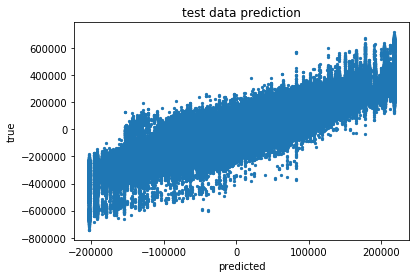

In [23]:
## Plotting the predicted price difference and the true price difference
import matplotlib.pyplot as plt
plt.scatter(y_pred_test_xgb,y_test, s=5)
plt.title('test data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

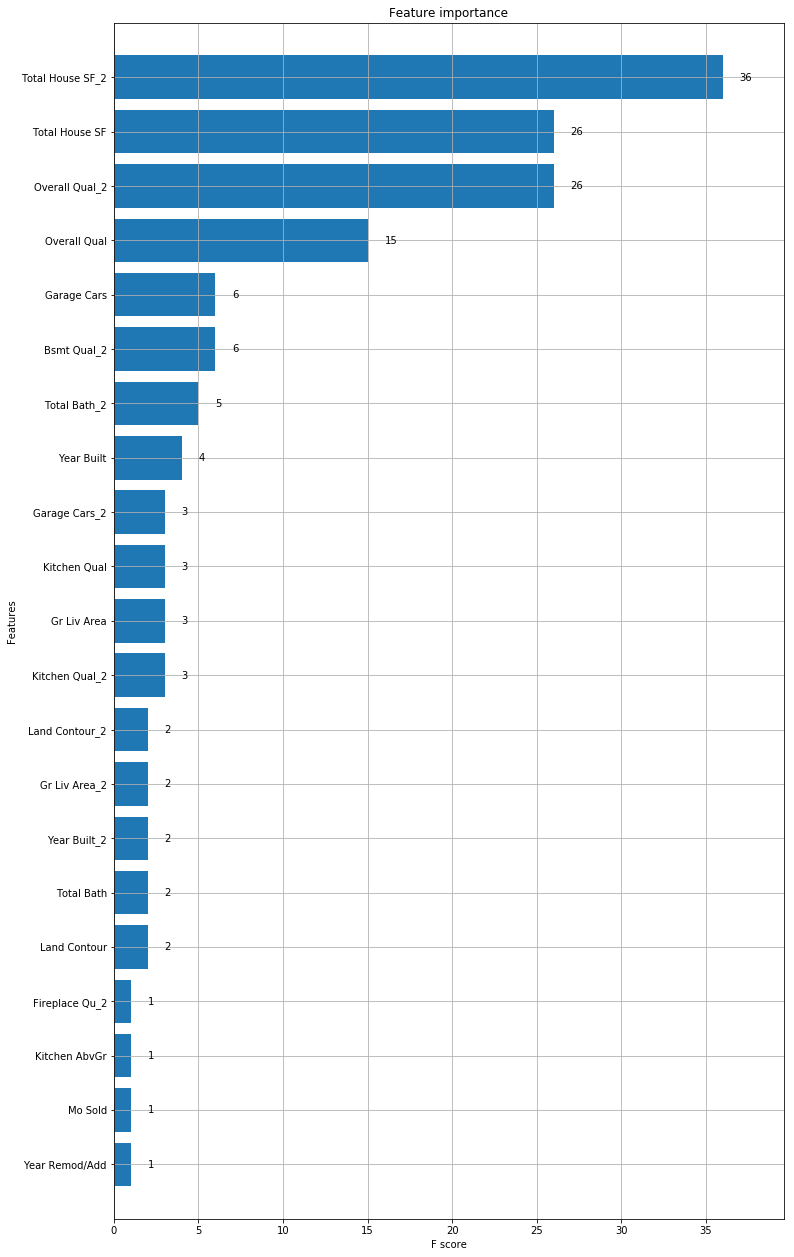

In [24]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,22))
xgb.plot_importance(Gb_model02, max_num_features=168, height=0.8, ax=ax)
plt.show()